# First Name: Kantapong
# Last Name: Wongsanguan

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import Data

In [2]:
bottle = pd.read_csv("bottle.csv", low_memory=False)
pd.set_option('display.float_format', lambda x: '%f' % x)
len(bottle)

864863

# Initial Data management 

In [3]:
# Convert variables to numeric.
bottle["Depthm"] = pd.to_numeric(bottle["Depthm"], errors="coerce")
bottle["PO4uM"] = pd.to_numeric(bottle["PO4uM"], errors="coerce")
bottle["SiO3uM"] = pd.to_numeric(bottle["SiO3uM"], errors="coerce")
bottle["T_degC"] = pd.to_numeric(bottle["T_degC"], errors="coerce")
bottle["NO2uM"] = pd.to_numeric(bottle["NO2uM"], errors="coerce")
bottle["NO3uM"] = pd.to_numeric(bottle["NO3uM"], errors="coerce")
bottle["NH3uM"] = pd.to_numeric(bottle["NH3uM"], errors="coerce")
bottle["STheta"] = pd.to_numeric(bottle["STheta"], errors="coerce")
bottle["PO4uM"].describe()

count   413317.000000
mean         1.564747
std          1.035966
min          0.000000
25%          0.470000
50%          1.570000
75%          2.480000
max          5.210000
Name: PO4uM, dtype: float64

In [4]:
# Replace nan values with 0.
bottle["SiO3uM"] = bottle["SiO3uM"].fillna(0)
bottle["Oxy_µmol/Kg"] = bottle["Oxy_µmol/Kg"].fillna(0)
bottle["NO2uM"] = bottle["NO2uM"].fillna(0)
bottle["NO3uM"] = bottle["NO3uM"].fillna(0)
bottle['NH3uM'] = bottle['NH3uM'].fillna(0)
bottle["STheta"] = bottle["STheta"].fillna(0)

# Task 1: Histogram

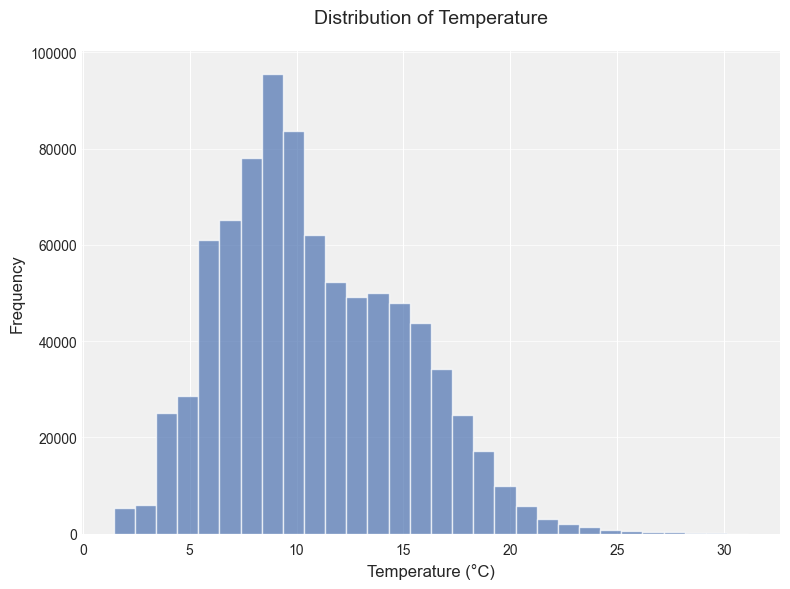

In [5]:
# Select the "T_degC" column
temperature_data = bottle['T_degC']

# Plot the histogram
plt.figure(figsize=(8, 6))

# Create a light gray background to reduce non-data ink
plt.gca().set_facecolor('#f0f0f0')
plt.grid(axis='y', linestyle='-', alpha=0.7)  # Add a faint horizontal grid

# Plot the histogram bars with a light color
plt.hist(temperature_data, bins=30, edgecolor='white', color='#4c72b0', alpha=0.7)

# Remove chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove ticks on the y-axis (ticks on the x-axis are fine for a histogram)
plt.tick_params(axis='y', length=0)

# Increase font size of axis labels for better readability
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve title and remove unnecessary chart elements
plt.title('Distribution of Temperature', fontsize=14, pad=20)

# Remove extra whitespace around the plot
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# Calculate Central Tendency
mean_temperature = temperature_data.mean()
median_temperature = temperature_data.median()
mode_temperature = temperature_data.mode().values[0]

# Calculate range and standard deviation
highest_temperature = temperature_data.max()
lowest_temperature = temperature_data.min()
range_temperature = temperature_data.max() - temperature_data.min()
std_temperature = temperature_data.std()

# Display the values
print(f"Mean Temperature: {mean_temperature:.2f} °C")
print(f"Median Temperature: {median_temperature:.2f} °C")
print(f"Mode Temperature: {mode_temperature:.2f} °C")
print(f"Range Temperature: {range_temperature:.2f} °C")
print(f"Standard Deviation: {std_temperature:.2f} °C")
print(f"Max: {highest_temperature:.2f} °C")
print(f"Min: {lowest_temperature:.2f} °C")

Mean Temperature: 10.80 °C
Median Temperature: 10.06 °C
Mode Temperature: 9.10 °C
Range Temperature: 29.70 °C
Standard Deviation: 4.24 °C
Max: 31.14 °C
Min: 1.44 °C


# Task 2: Boxplot

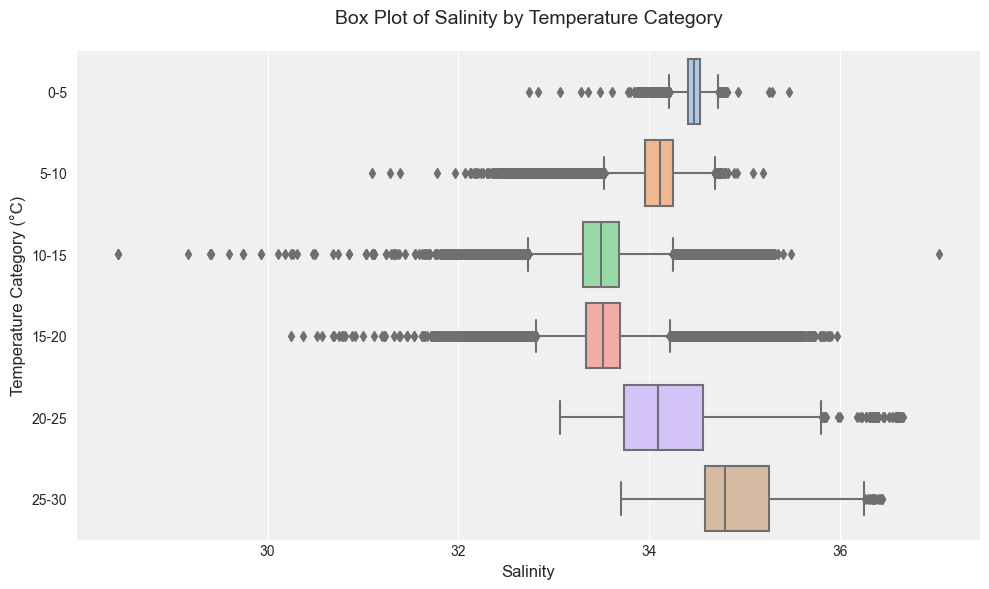

In [7]:
# Group the quantitative variable (T_degC) into categories (explanatory variable)
bottle['Temperature Category'] = pd.cut(bottle['T_degC'], bins=[0, 5, 10, 15, 20, 25, 30],
                                        labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

# Set the default color palette to a light color
sns.set_palette('pastel')

# Plot the box plot with a horizontal layout
plt.figure(figsize=(10, 6))

# Create a light gray background to reduce non-data ink
plt.gca().set_facecolor('#f0f0f0')
plt.grid(axis='y', linestyle='-', alpha=0.7)  # Add a faint horizontal grid

# Plot the box plot without black borders around boxes
sns.boxplot(x='Salnty', y='Temperature Category', data=bottle, orient='h')

# Remove chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Remove ticks on the x-axis (ticks on the y-axis are fine for a box plot)
plt.tick_params(axis='x', length=0)

# Increase font size of axis labels and title for better readability
plt.xlabel('Salinity', fontsize=12)
plt.ylabel('Temperature Category (°C)', fontsize=12)
plt.title('Box Plot of Salinity by Temperature Category', fontsize=14, pad=20)

# Remove extra whitespace around the plot
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Calculate the summary statistics
summary_stats = bottle.groupby('Temperature Category')['Salnty'].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                             count      mean      std       min       25%  \
Temperature Category                                                        
0-5                   45126.000000 34.455803 0.127214 32.740000 34.400000   
5-10                 354196.000000 34.075892 0.260906 31.090000 33.958000   
10-15                263204.000000 33.537885 0.421095 28.431000 33.300000   
15-20                135911.000000 33.565427 0.408638 30.250000 33.337000   
20-25                 14076.000000 34.178384 0.557595 33.062500 33.730000   
25-30                  1698.000000 34.883948 0.433533 33.699000 34.580000   

                           50%       75%       max  
Temperature Category                                
0-5                  34.467000 34.530000 35.462000  
5-10                 34.107000 34.249000 35.190000  
10-15                33.490000 33.679000 37.034000  
15-20                33.511000 33.690000 35.970000  
20-25                34.090000 34.560000 36.6

# Task 3: Line chart


In [9]:
# Obtain a subset of the data such that T_degC is recorded.
sub2 = bottle[(bottle["T_degC"] != 0) & (bottle["Depthm"] <= 1000)].copy()
sub2["T_degC"].value_counts(sort=False, dropna=False)

T_degC
10.500000    734
10.460000    747
10.450000    582
10.240000    741
10.060000    877
            ... 
13.845000      1
10.071000      1
18.692000      1
18.161000      1
17.533000      1
Name: count, Length: 13604, dtype: int64

In [10]:
# Group T_degC by water depth.
var1 = sub2.groupby(["Depthm"])["T_degC"].mean()
var1

Depthm
0      16.468391
1      16.569793
2      16.093050
3      16.127862
4      15.596532
          ...   
996     3.868947
997     3.939130
998     3.970312
999     3.865385
1000    3.973833
Name: T_degC, Length: 1001, dtype: float64

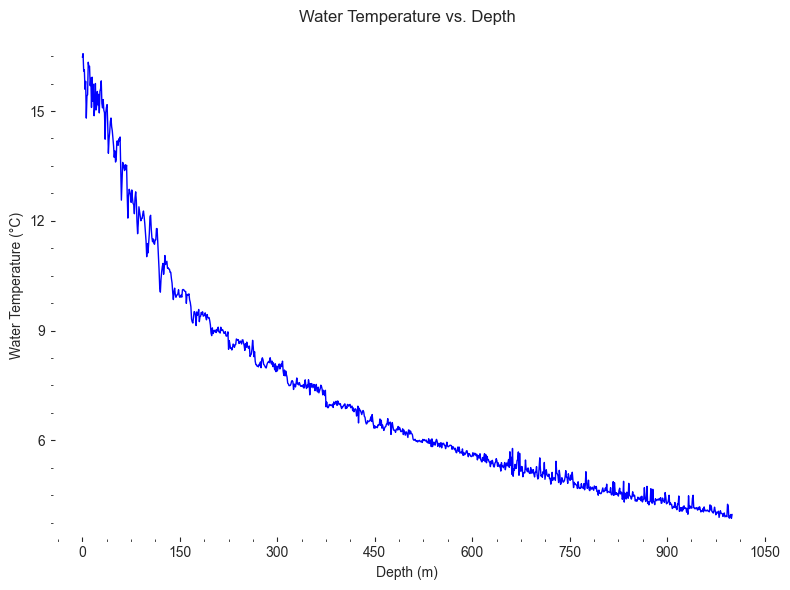

In [11]:
# Line Chart
plt.figure(figsize=(8, 6))
plt.plot(var1, color='blue', linewidth=1)

# Tufte's Heuristics
plt.xlabel('Depth (m)')
plt.ylabel('Water Temperature (°C)')
plt.title('Water Temperature vs. Depth')
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Remove chart borders and background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('none')

# Remove excessive ticks and labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

# Remove chart junk (extra lines, markers, etc.)
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
plt.gca().xaxis.tick_bottom()
plt.gca().yaxis.tick_left()

plt.tight_layout()
plt.show()

# Task 4: Bubble chart 

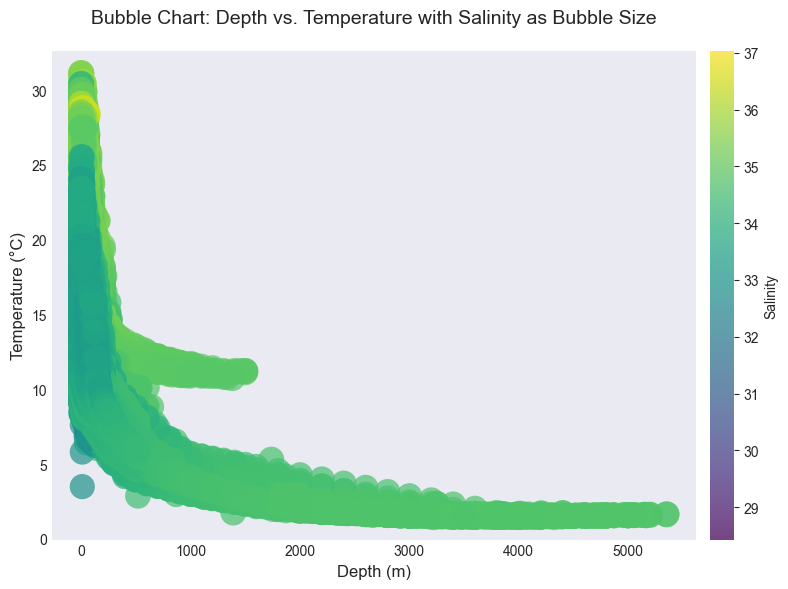

In [12]:
# Select the three quantitative variables for the bubble chart
x = bottle['Depthm']
y = bottle['T_degC']
z = bottle['Salnty']

# Define the color map (e.g., 'viridis', 'plasma', 'magma', 'cividis')
color_map = 'viridis'

# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Create the bubble chart with appropriate size scaling
bubble_size = z * 10
sc = ax.scatter(x, y, s=bubble_size, c=z, cmap=color_map, alpha=0.7, edgecolors='none')

# Remove chart borders and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Adjust tick parameters
plt.tick_params(axis='both', which='both', length=0)

# Set axis labels
plt.xlabel('Depth (m)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Improve title and remove unnecessary chart elements
plt.title('Bubble Chart: Depth vs. Temperature with Salinity as Bubble Size', fontsize=14, pad=20)
plt.grid(False)

# Add color bar legend using the scatter plot 'sc' as the mappable
cbar = plt.colorbar(sc, label='Salinity', fraction=0.04, pad=0.02)
cbar.outline.set_visible(False)

# Increase spacing between plot title and the rest of the plot
plt.tight_layout()

# Show the plot
plt.show()

# Task 5: Select Plot

C:\Users\kanta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kanta\AppData\Local\Temp\ipykernel_7412\3953672673.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


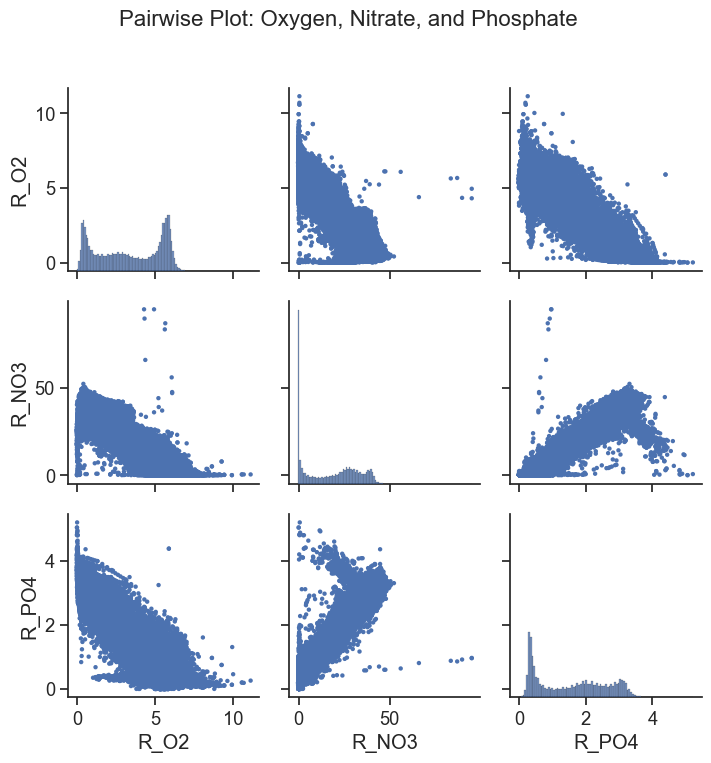

In [13]:
# Selecting data for the Pairwise Plot
selected_vars = bottle[['R_O2', 'R_NO3', 'R_PO4']]

# Create the Pairwise Plot with Edward Tufte's graphical heuristics
sns.set(style='ticks', font_scale=1.2)
g = sns.pairplot(selected_vars, plot_kws={'s': 10, 'edgecolor': 'none'}, diag_kws={'edgecolor': 'k'})

# Remove top and right spines from each subplot
for ax in g.axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust tick label size for each subplot
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a title to the Pairwise Plot
g.fig.suptitle('Pairwise Plot: Oxygen, Nitrate, and Phosphate', y=1.02, fontsize=16)

# Tight layout for better spacing
plt.tight_layout()

# Show the Pairwise Plots
plt.show()

In [14]:
# Selecting data for the Pairwise Plot
selected_vars = bottle[['R_O2', 'R_NO3', 'R_PO4']]

# Summary statistics for the selected variables
summary_stats = selected_vars.describe()

# Correlation matrix
correlation_matrix = selected_vars.corr()

# Print the summary statistics and correlation matrix
print("Summary Statistics:")
print(summary_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
               R_O2         R_NO3         R_PO4
count 696201.000000 337411.000000 413325.000000
mean       3.392498     17.302188      1.564736
std        2.073271     14.581998      1.035973
min       -0.010000     -0.400000      0.000000
25%        1.360000      0.600000      0.470000
50%        3.440000     18.100000      1.570000
75%        5.500000     30.000000      2.480000
max       11.130000     95.000000      5.210000

Correlation Matrix:
           R_O2     R_NO3     R_PO4
R_O2   1.000000 -0.969969 -0.973389
R_NO3 -0.969969  1.000000  0.987369
R_PO4 -0.973389  0.987369  1.000000
